# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/CLV.csv")


In [4]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [5]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (5,20,),(10,50,),(10,100,10,)], 
    "activation" : ['relu','logistic','tanh']
},

In [11]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid=({'activation': ['relu', 'logistic', 'tanh'],
                          'hidden_layer_sizes': [(10,), (5, 20), (10, 50),
                                                 (10, 100, 10)]},))

In [12]:
print('Best parameters:',grid.best_params_)
print('Best score',grid.best_score_)

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (10, 100, 10)}
Best score 0.06839826762699855


# 3.) Train a model with the optimal solution from GridSearch

In [13]:
best_model=MLPRegressor(hidden_layer_sizes=(10, 100, 10), activation='relu')
best_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 100, 10))

# 4.) What are the in-sample and out of sample MSEs

In [14]:
from sklearn.metrics import mean_squared_error

y_pred_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
y_pred_test =best_model.predict(X_test)
mse_test= mean_squared_error(y_test, y_pred_test)

print("In-sample MSE: ", mse_train)
print("Out of Sample MSE", mse_test)


In-sample MSE:  42555287.74390573
Out of Sample MSE 43755230.7217114


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [16]:
from tensorflow import keras
from tensorflow.keras import layers


In [17]:
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])


In [20]:
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, epochs=100, batch_size=32)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 64662268.0000
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 44154876.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 43623168.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 43313160.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 43347876.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 43209556.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 43188020.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 43126040.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 43122348.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 42969772.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 43066328.0000
Epoch 12/100
200/20

In [36]:
keras.models.save_model(model,"/folder")

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

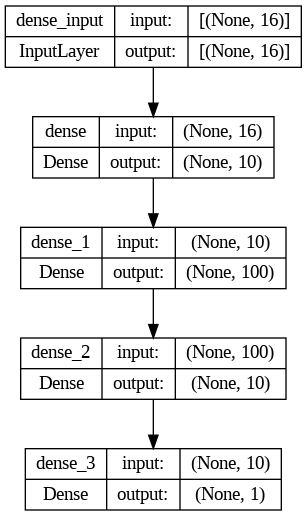

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [42]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from ann_visualizer.visualize import ann_viz

In [46]:
ann_viz(model,title='CLV NN Viz',filename='/folder/nn_model.gz')

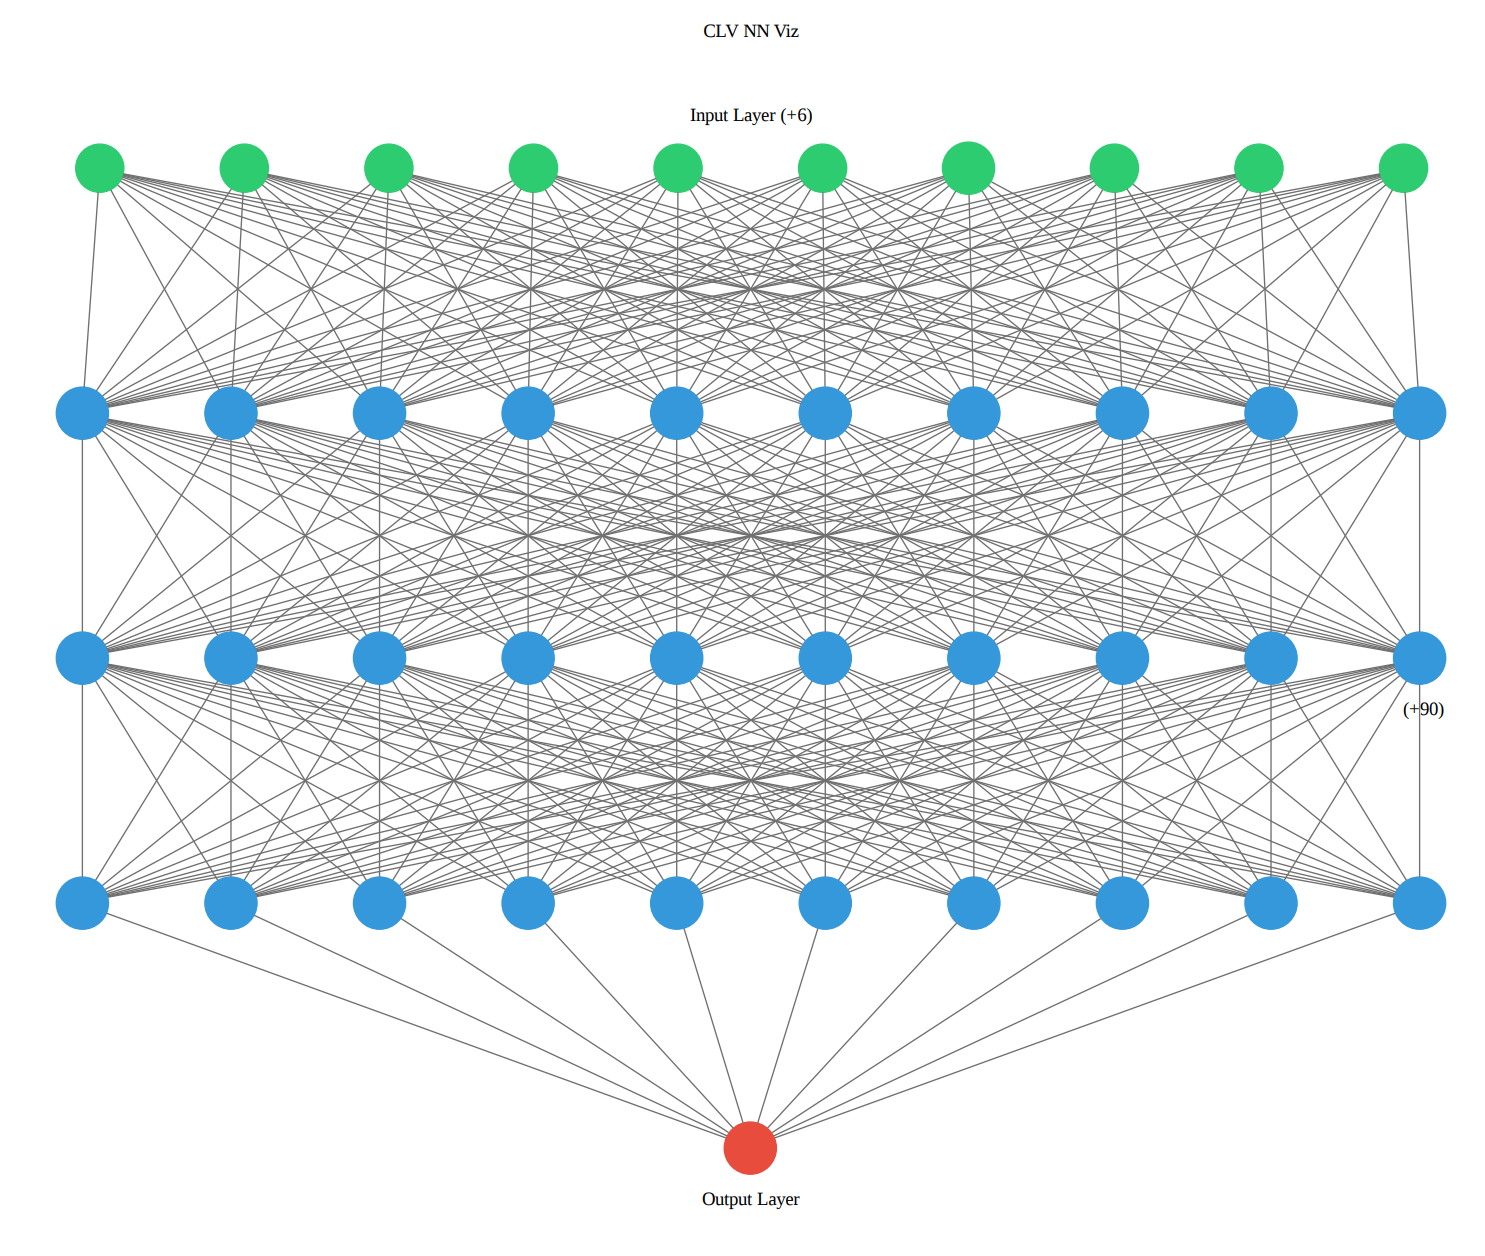

In [2]:
from IPython.display import Image
Image(filename = 'C:/Users/xubiying/Desktop/visualization.png', width=1000, height=1000)